# **1. Import Library**

In this step, I import several Python libraries required for data analysis and machine learning model development.

In [282]:
import pandas as pd #Imported for manipulate and analyse data as DataFrame
from sklearn.model_selection import train_test_split # Split data for training and testing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler #Convert 
import seaborn as sns # Plot statistic
import numpy as np # For array and math 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score #For evaluate model
import matplotlib.pyplot as plt # For make visualize data

# **2. Load Dataset from Clustering Process**

In [283]:
# Load dataset from csv file
data = pd.read_csv('bank_transactions_data_clustered.csv')

#Show data and its information
print(data.head())
data.info()

   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0         5112.21         70.0     ATM           Debit  San Diego        0
1        13758.91         68.0     ATM           Debit    Houston        1
2         1122.35         19.0  Online           Debit       Mesa        1
3         8569.06         26.0  Online           Debit    Raleigh        0
4         7429.40         26.0  Online          Credit    Atlanta        2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountBalance   2512 non-null   float64
 1   CustomerAge      2512 non-null   float64
 2   Channel          2512 non-null   object 
 3   TransactionType  2512 non-null   object 
 4   Location         2512 non-null   object 
 5   Cluster          2512 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 117.9+ KB


# **3. Data Splitting**

In this section, the goal is splitting the data into two part: Training and  Testing.

In [284]:
#Init Label Encoder
label_encoder = LabelEncoder()

# List categorical column
categorical_columns = ['Channel', 'TransactionType', 'Location']

#Convert Categorical Data into Numerical Data
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
    
data.head()    

,AccountBalance,CustomerAge,Channel,TransactionType,Location,Cluster
0,5112.21,70.0,0,1,36,0
1,13758.91,68.0,0,1,15,1
2,1122.35,19.0,2,1,23,1
3,8569.06,26.0,2,1,33,0
4,7429.40,26.0,2,0,1,2


In [285]:
# Instance MinMaxScaler
scaler = MinMaxScaler()

data['Cluster'] = data['Cluster'].astype('category')
print(data.head())

# Normalize all numeric features
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Split X for features and Y for target
X = data.drop(columns=['Cluster'])
y = data['Cluster']

#Split 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Show testing and training
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

   AccountBalance  CustomerAge  Channel  TransactionType  Location Cluster
0         5112.21         70.0        0                1        36       0
1        13758.91         68.0        0                1        15       1
2         1122.35         19.0        2                1        23       1
3         8569.06         26.0        2                1        33       0
4         7429.40         26.0        2                0         1       2
Training set shape: X_train=(2009, 5), y_train=(2009,)
Test set shape: X_test=(503, 5), y_test=(503,)


# **4. Classification Model Development**


## **a. Develop Classification Model**

In [286]:
#Train the model
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Training Model Finished.")

Training Model Finished.


Explanation about Algorithm:
1. **K-Nearest Neighbors (KNN)** – Classifies based on the majority of *k* nearest neighbors; simple but slow on large datasets.  
2. **Decision Tree (DT)** – Splits data into branches based on feature conditions; 
3. **Random Forest (RF)** – An ensemble of Decision Trees; reduces overfitting and improves accuracy.  
4. **Support Vector Machine (SVM)** – Finds the optimal hyperplane for class separation; effective but computationally expensive.  
5. **Gaussian Naive Bayes (NB)** – Probabilistic classifier assuming feature independence; fast but less accurate.

## **b. Evaluation Classification Model**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [287]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results
 
# Evaluate every model
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}
 
# Create dataframe to summery the result
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# assign the dataframe
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# convert to dataframe
summary_df = pd.DataFrame(rows)
 
# show DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.934394   0.935484  0.934394  0.934656
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.978131   0.978418  0.978131  0.978143
4              Naive Bayes (NB)  1.000000   1.000000  1.000000  1.000000


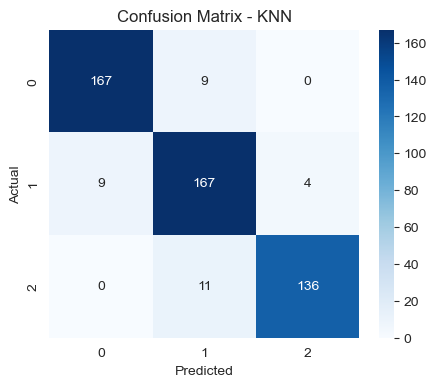

KNN - Accuracy: 0.9344, F1-Score: 0.9347



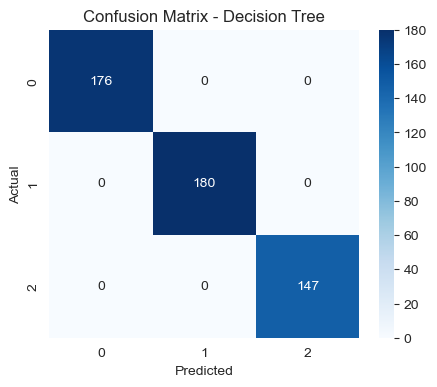

Decision Tree - Accuracy: 1.0000, F1-Score: 1.0000



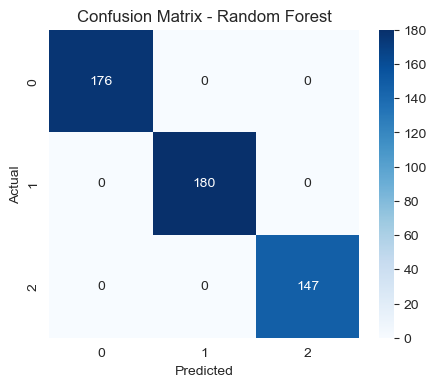

Random Forest - Accuracy: 1.0000, F1-Score: 1.0000



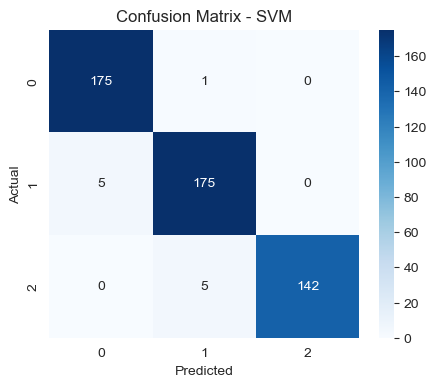

SVM - Accuracy: 0.9781, F1-Score: 0.9781



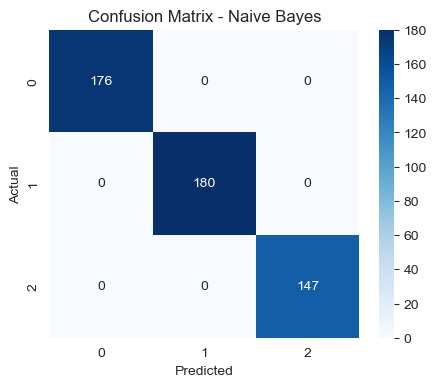

Naive Bayes - Accuracy: 1.0000, F1-Score: 1.0000



In [288]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {acc:.4f}, F1-Score: {f1:.4f}\n")

# Plot confusion matrices for each model
plot_confusion_matrix(knn, X_test, y_test, "KNN")
plot_confusion_matrix(dt, X_test, y_test, "Decision Tree")
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_confusion_matrix(svm, X_test, y_test, "SVM")
plot_confusion_matrix(nb, X_test, y_test, "Naive Bayes")

# Key Observation:
1. Decision Tree, Random Forest, and Naive Bayes achieved perfect scores (100%) across all evaluation metrics.
2. KNN achieved an accuracy of 93.4%, which is reasonable but lower than three model before.
3. SVM performed well with 97.8% accuracy, 

## **e. Analysis of Classification Model Evaluation Results**


- Decision Tree, Random Forest, and Naïve Bayes obtain perfect score 100% in overall evaluation metrics. It indicates that those models are overfit. 
- KNN accuracy is 93.4%. KNN still below accuracy from SVM. SVM is 97.8%. Regardless lower the accuracy, I think KNN is better than SVM. It can generalize better. 
- My suggestion is  need for further validation, cross-validation, or pruning techniques to ensure these models generalize well to unseen data.
   